# Laboratorio 1 
## Procesamiento digital de señales



Para el desarrollo de los laboratorios se seguirá la siguiente dinamica:
1. Creación del entorno virtual y activacion mediante los comandos ``` python -m venv myenv``` y ``` source myenv/Scripts/activate``` Para el manejo de las lilbrerias

2. Instalación de las dependecias y librerias mediante ``` pip ```

3. Desarrollo de la practica, en el ```.ipynb``` 


En este laboratorio se pretende hacer un repaso de los conceptos basicos de programación en python con ejemplos que se usaran durante todo el semestre. 


In [ ]:
# instalación de librerias necesarias para el desarrollo del laboratorio
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


### Ejercicios de Python

- Escriba un programa que encuentre el valor aproximado del número de euler con base a la suma infinita de
 la Ecuación 1. El usuario debe ingresar el número de elementos usados en la aproximación. Por ejemplo, si se
 ingresa 3 $e = \frac{1}{0!}+ \frac{1}{1!} + \frac{1}{2!} = 2.5$

 $$e = \frac{1}{0!}+ \frac{1}{1!} + \frac{1}{2!} + \frac{1}{3!}+ \frac{1}{4!} + \frac{1}{5!} + ...$$

 **Nota:** El formato de salida debe ser: e es aproximadamente: 2.5

In [19]:
import math

num = input("Ingrese un número: ")
e = 0

if num.isdigit():
    for i in range(0, int(num)):
        e = e + 1/math.factorial(i)
    
    print("e es aproximadamente: ", e)
else:
    print("El valor ingresado no es un número")    


e es aproximadamente:  2.7182818284590455


- Implemente el anterior ejercicio en una función

In [ ]:
def e_aprox(n):
    """
    Calcula una aproximación del número de Euler (e) utilizando una serie de Taylor.

    La función suma los primeros `n` términos de la expansión en serie de Taylor de e^x en x=1:
    
        e ≈ Σ (1 / i!) para i en [0, n-1]

    Parámetros:
    -----------
    n : int
        Número de términos a considerar en la serie de Taylor.

    Retorna:
    --------
    float
        Aproximación del número de Euler (e) usando `n` términos.
    
    Ejemplo:
    --------
    >>> e_aprox(10)
    2.7182818011463845
    """
    e = 0
    for i in range(0, n):
        e = e + 1/math.factorial(i)
    
    return e

n = input("Ingrese un número: ")
if n.isdigit():
    print("e es aproximadamente: ", e_aprox(int(n)))
else:
    print("El valor ingresado no es un número")


e es aproximadamente:  2.7182818284590455


- Pida a un bucle _while_ un nombre y una edad, almacenandolos en una lista de duplas, hasta que el usuario diga no más. Ahora recorra esa lista mediante un ciclo _for_, imprimiendo nombre y edad, e indicando si es mayor de edad o no


In [ ]:
flag = True
personas = []

while flag:
    name = input("Ingrese su nombre: ")
    age = input("Ingrese su edad: ")
    
    if name == "no mas" or age == "no mas":
        flag = False
        break
    else:
        #save on a tuple
        personas.append((name, age))

print("Lista de personas:")
for persona in personas:

    #indicate if the person is major
    estado = "es mayor de edad" if int(persona[1]) >= 18 else "es menor de edad"

    print(f"{persona[0]}, {persona[1]} años, {estado}")



Lista de personas:
('angie 22', '22')
angie 22 es mayor de edad
('julian', '12')
('mama', '23')
mama es mayor de edad
('papa ', '12')


-  Implemente el anterior ejercicio en varias funciones. Una debe retornar la dupla de nombre y edad. Otra debe recibir una edad y retornar un valor Booleano indicando si es mayor de edad o no.

In [ ]:
def pedir_datos():
    personas = []
    while True:
        name = input("Ingrese su nombre: ")
        if name == "no mas":
            return personas
        
        age = input("Ingrese su edad: ")
        
        personas.append((name, age))

def es_mayor_de_edad(edad):
    
    return int(edad) >= 18


    

personas = pedir_datos()

print("\nLista de personas:")

for persona in personas:
    estado = "es mayor de edad" if es_mayor_de_edad(persona[1]) else "es menor de edad"
    print(f"{persona[0]}, {persona[1]} años, {estado}")




Lista de personas:
julian, 12 años, es menor de edad
Angie, 21 años, es mayor de edad


## EJERCICIOS CON SEÑALES Y NUMPY

- Cierto sistema necesita que usted calcule una métrica. Sea $C ∈ R^{n×n}$ una matrix $n x n$ de números reales. Genera una matrix aleatoria $C$ donde $n$ es ingresado por el usuario ($n$ es un número entero). Calcule la métrica de acuerdo a la Ecuación, donde $T(r)$ es la traza de la matriz $C$

$$
text{métrica} = \frac{\operatorname{tr}(C)}{\sum_{i=0}^{n-1} \sum_{j=0}^{n-1} c_{ij}}.
$$

**nota:** La traza de una matrizx es la sumatoria de los elementos de su diagonal principal

In [31]:
import numpy as np

def calcular_metrica(n):
    C = np.random.rand(n, n)

    traza_C = np.trace(C)
    suma_C = np.sum(C)

    metrica = traza_C / suma_C if suma_C != 0 else 0

    return C, traza_C, suma_C, metrica

n = int(input("Ingrese un número: "))

C, traza_C, suma_C, metrica = calcular_metrica(n)

print(f"Matriz C:\n{C}")
print(f"Tr(C) = {traza_C}")
print(f"Suma(C) = {suma_C}")
print(f"Métrica = {metrica}")


Matriz C:
[[0.95563099 0.14402339 0.14082817]
 [0.50851338 0.91633695 0.23549194]
 [0.12394324 0.40612772 0.96572953]]
Tr(C) = 2.8376974723777173
Suma(C) = 4.396625326561881
Métrica = 0.6454262671039949


- El siguiente código genera una señal aleatoria de longitud variable (de acuerdo a su edad):

In [32]:
import numpy as np
edad = 23
senal=np.empty((0,))
matriz=np.empty((0,100))
for i in range(edad):
    ventana=np.random.rand()*np.random.randn(100)+np.random.rand()
    senal=np.hstack((senal,ventana)) # Para concatenar en un vector
    matriz=np.vstack((matriz,ventana)) # Para concatenar en una matriz

Grafique la señal (en la variable ```senal```). Nombre los ejes, utilice la cuadracula. Recuerde utilizar el comando ``` %matplotlib inline``` para que la grafica se incruste en el notebook.

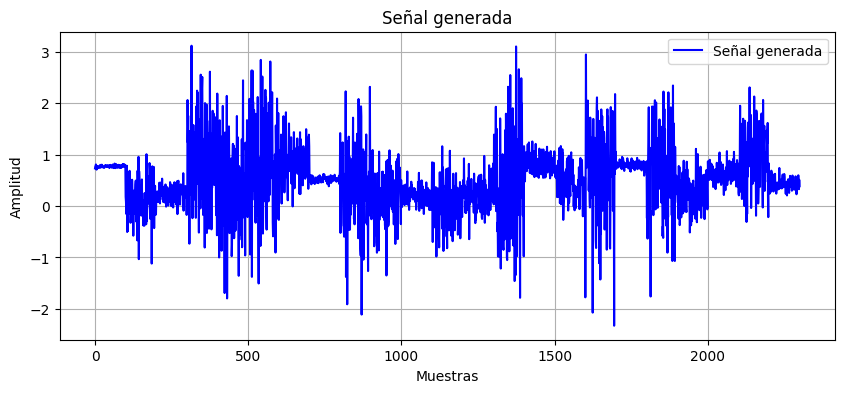

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(senal, label='Señal generada', color='blue')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Señal generada')
plt.grid()
plt.legend()
plt.show()


Ahora utilice un ciclo _for_ para recorrer cada una de las filas de la matriz con las ventanas, y en cada iteración calcule e imprima la media y la desviación estándar. ¿Cómo se relacionan estos valores con la gráfica que generó anteriormente?

In [34]:
for i, fila in enumerate(matriz):
    media = np.mean(fila)
    varianza = np.var(fila)
    print(f"Fila {i}: media = {media}, varianza = {varianza}")


Fila 0: media = 0.7725515610102945, varianza = 0.00046733283745719104
Fila 1: media = 0.10599887021474423, varianza = 0.16745711338663016
Fila 2: media = 0.2386217955960251, varianza = 0.022771534454741896
Fila 3: media = 0.9436766790512603, varianza = 0.6878036899794511
Fila 4: media = 0.26827629535682473, varianza = 0.6626441609383751
Fila 5: media = 0.7736720603522353, varianza = 0.8832285298550032
Fila 6: media = 0.8674247242277544, varianza = 0.13873511206350161
Fila 7: media = 0.5256794949149254, varianza = 0.0023694765588812804
Fila 8: media = 0.3674123075030291, varianza = 0.6502354826928002
Fila 9: media = 0.1523015231495358, varianza = 0.24634559339247303
Fila 10: media = 0.19311426991056127, varianza = 0.025775660704781943
Fila 11: media = 0.004156636641861399, varianza = 0.20011619122797528
Fila 12: media = 0.22408776096011507, varianza = 0.08564851256288662
Fila 13: media = 0.3639819969389155, varianza = 0.984273795113431
Fila 14: media = 0.8342103470501216, varianza = 0.0

La media y la desviación estandar de cada ventana reflejan las variaciones locales de la señal, lo que quiere decir que si la desviación estándar es alta, la señal es mas dispersa y sus valores menos predecibles. 

La media muestra la tendencia central o hacia donde se dirijen los valores de cada ventana.


- Implemente en dos funciones el anterior ejemplo, la primera debe recibir su edad (o el número de iteraciones del ciclo) y devolver la señal y la matriz de ventanas. La segunda debe recibir estas dos variables, graficar la señal y devolver un vector con las medias y desviaciones estándar por ventana.

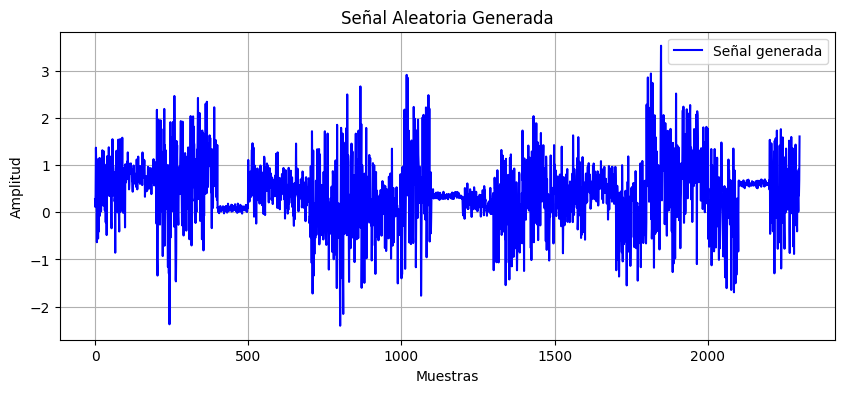

Ventana 1: Media = 0.5583, Desviación estándar = 0.5403
Ventana 2: Media = 0.7884, Desviación estándar = 0.1927
Ventana 3: Media = 0.5067, Desviación estándar = 0.9374
Ventana 4: Media = 0.8447, Desviación estándar = 0.7244
Ventana 5: Media = 0.0806, Desviación estándar = 0.0491
Ventana 6: Media = 0.5975, Desviación estándar = 0.3326
Ventana 7: Media = 0.4589, Desviación estándar = 0.2919
Ventana 8: Media = 0.0156, Desviación estándar = 0.6971
Ventana 9: Media = 0.3076, Desviación estándar = 0.9419
Ventana 10: Media = 0.0290, Desviación estándar = 0.4980
Ventana 11: Media = 0.6422, Desviación estándar = 0.9302
Ventana 12: Media = 0.3523, Desviación estándar = 0.0437
Ventana 13: Media = 0.2251, Desviación estándar = 0.1623
Ventana 14: Media = 0.0243, Desviación estándar = 0.7186
Ventana 15: Media = 0.4906, Desviación estándar = 0.6902
Ventana 16: Media = 0.3418, Desviación estándar = 0.4616
Ventana 17: Media = 0.5660, Desviación estándar = 0.2653
Ventana 18: Media = -0.1402, Desviación 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generar_senal_y_matriz(edad):
    senal = np.empty((0,))
    matriz = np.empty((0, 100))

    for _ in range(edad):
        ventana = np.random.rand() * np.random.randn(100) + np.random.rand()
        senal = np.hstack((senal, ventana))  # Concatenar en un vector
        matriz = np.vstack((matriz, ventana))  # Concatenar en una matriz
    
    return senal, matriz


def analizar_y_graficar_senal(senal, matriz):
    
    # Graficar la señal
    plt.figure(figsize=(10, 4))
    plt.plot(senal, label="Señal generada", color="b")
    plt.xlabel("Muestras")
    plt.ylabel("Amplitud")
    plt.title("Señal Aleatoria Generada")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Calcular medias y desviaciones estándar por ventana
    estadisticas = np.array([(np.mean(fila), np.std(fila)) for fila in matriz])
    
    for i, (media, desviacion) in enumerate(estadisticas):
        print(f"Ventana {i+1}: Media = {media:.4f}, Desviación estándar = {desviacion:.4f}")

    return estadisticas


# Llamar a las funciones
edad = int(input("Ingrese su edad (o número de iteraciones): "))
senal, matriz = generar_senal_y_matriz(edad)
estadisticas = analizar_y_graficar_senal(senal, matriz)
